In [1]:
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from html import unescape

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import catboost as ctb
import lightgbm as lgb

from scikitplot.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

import helper as h
%matplotlib inline

In [2]:
df = pd.read_csv('coaid_text.csv')

In [3]:
df.sample(10)

,target,text,text_norm
1734,true,cdc has developed interim guidance for how hea...,cdc has developed interim guidance for how hea...
1476,true,the covid-19 pandemic and resulting lockdown a...,the covid-19 pandemic and resulting lockdown a...
1644,true,the post deployment processes include the rrt ...,the post deployment processes include the rrt ...
1717,true,significant social support may be necessary to...,significant social support may be necessary to...
1825,true,look for emergency warning signs for covid-19....,look for emergency warning signs for covid-19....
1217,true,the twenty fourth meeting of the emergency com...,the twenty fourth meeting of the emergency com...
222,true,when people are hostile online it is often bec...,when people are hostile online it is often bec...
1494,true,an antibody that scientists first identified i...,an antibody that scientists first identified i...
2571,true,in february 2020 cdc issued guidance advising ...,in february 2020 cdc issued guidance advising ...
677,true,what your doctor is reading on medscape.com ap...,what your doctor is reading on medscape.com ap...


tokens #90: ["'s" '--' '2019' '2020' 'according' 'april' 'available' 'based' 'care'
 'case' 'cases' 'causes' 'cdc' 'children' 'contact' 'control'
 'coronavirus' 'cov-2' 'covid-19' 'covid-19.' 'data' 'date.' 'disease'
 'doctor' 'experts' 'face' 'follow' 'getty' 'guidance' 'health'
 'healthcare' 'help' 'home' 'hub' 'illness' 'images' 'including'
 'infection' 'information' 'live' 'march' 'masks' 'medical' 'medscape.com'
 'national' 'need' 'new' 'news' 'nt' 'number' 'outbreak' 'outbreak.'
 'page' 'pandemic' 'pandemic.' 'patients' 'people' 'person' 'prevention'
 'public' 'publication.' 'publicly' 'reading' 'recent' 'research'
 'researchers' 'respiratory' 'risk' 'said' 'sars' 'say' 'severe' 'social'
 'spread' 'state' 'states' 'statistics' 'study' 'symptoms' 'testing'
 'time' 'u.s.' 'united' 'updates' 'use' 'vaccine' 'virus' 'visit'
 'workers' 'world']
model=dummy, f1_micro: mean=0.88, std=0.01
model=svm, f1_micro: mean=0.94, std=0.0
model=naive bayes, f1_micro: mean=0.88, std=0.01
model=deci

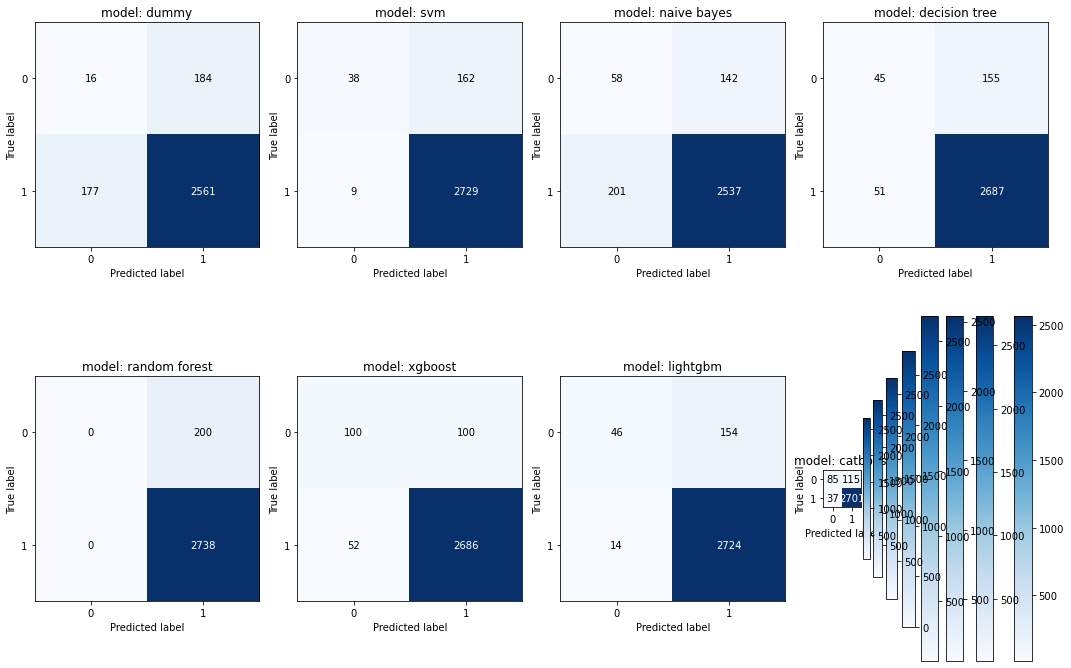

In [4]:
# Podejście z klasycznym Bag-of-words z użyciem CountVectorizer

# Budujemy podstawowy Tokenizer (funkcja do zliczania Tokenów w Dokumentach)

def get_tokens(sentence):
    one_ws_sent = " ".join(sentence.split())
    return [x.lower() for x in one_ws_sent.split(' ')]

le = LabelEncoder()
y = le.fit_transform(df["target"])
X = df['text']

vectorizer_kwargs = {'max_features': 90, 
                     'tokenizer': get_tokens, 
                     'stop_words': 'english'
                    }

kwargs = {'scoring': 'f1_micro', 
          'cv': 5, 
          'plot_result': False
         }

h.use_vectorizer_and_run_models(X, y, CountVectorizer, vectorizer_kwargs, kwargs)

tokens #100: ["'s" '--' '2019' '2020' 'according' 'april' 'available' 'based' 'care'
 'case' 'cases' 'causes' 'cdc' 'children' 'clinical' 'community'
 'confirmed' 'contact' 'control' 'coronavirus' 'cov-2' 'covid-19'
 'covid-19.' 'data' 'date.' 'disease' 'doctor' 'experts' 'face' 'flu'
 'follow' 'getty' 'guidance' 'health' 'healthcare' 'help' 'higher' 'home'
 'hub' 'illness' 'images' 'important' 'including' 'infection'
 'information' 'like' 'live' 'march' 'masks' 'medical' 'medscape.com'
 'national' 'need' 'new' 'news' 'nt' 'number' 'outbreak' 'outbreak.'
 'page' 'pandemic' 'pandemic.' 'patients' 'people' 'person' 'prevention'
 'protect' 'public' 'publication.' 'publicly' 'reading' 'recent'
 'research' 'researchers' 'respiratory' 'response' 'risk' 'said' 'sars'
 'say' 'severe' 'social' 'spread' 'state' 'states' 'statistics' 'stay'
 'study' 'symptoms' 'testing' 'time' 'u.s.' 'united' 'updates' 'use'
 'vaccine' 'virus' 'visit' 'workers' 'world']
model=dummy, f1_micro: mean=0.87, std=0.01


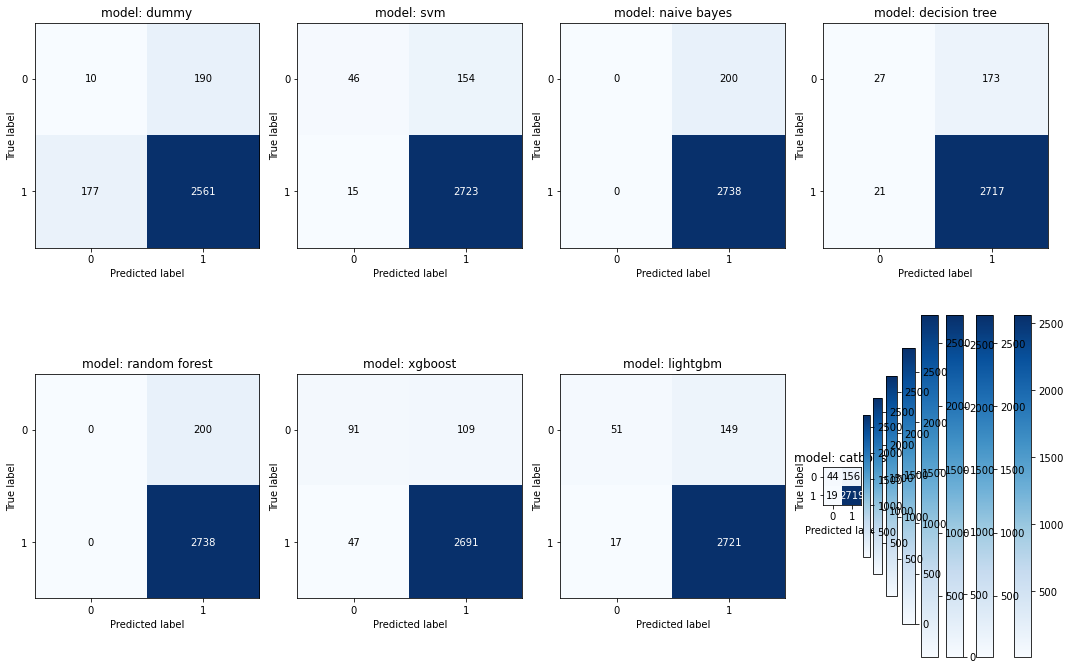

In [5]:
# Podejście z użyciem TfidfVectorizer

le = LabelEncoder()
y = le.fit_transform(df["target"])
X = df['text']

vectorizer_kwargs = {'max_features': 100, 
                     'tokenizer': get_tokens, 
                     'stop_words': 'english'
                    }

kwargs = {'scoring': 'f1_micro', 
          'cv': 5, 
          'plot_result': False
         }

h.use_vectorizer_and_run_models(X, y, TfidfVectorizer, vectorizer_kwargs, kwargs)